In [1]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

from gplearn.genetic import SymbolicRegressor

In [2]:
data = np.load(Path().resolve().parents[1] / f"data/chrome_data.npy", allow_pickle=True)[()]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'], train_size=0.8)

In [4]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(pd.DataFrame(X_train, columns=data['features']), y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.92      8.90292e+15       31          11878.6          10373.7      1.11m
   1    20.10      2.23424e+09       31          11433.8          14363.8      1.01m
   2    35.06      3.51026e+09       37          11083.5          17506.1      1.10m
   3    38.35      8.36128e+06       31          10099.3          10858.1      1.09m
   4    33.10      8.92328e+07       47          7585.66          7735.66      1.02m
   5    36.47      1.79329e+13       39          6294.68          4794.58     56.76s
   6    40.17      2.09985e+07       39          5867.27          8628.58     56.04s
   7    40.41      9.68981e+08       63          5595.66          9831.82     52.54s
   8    45.13       2.4873e+06       39          5336.77          11074.4  

SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [13]:
d = {k: f'X{v}' for k, v in zip(data['features'], range(1, 27))}

d


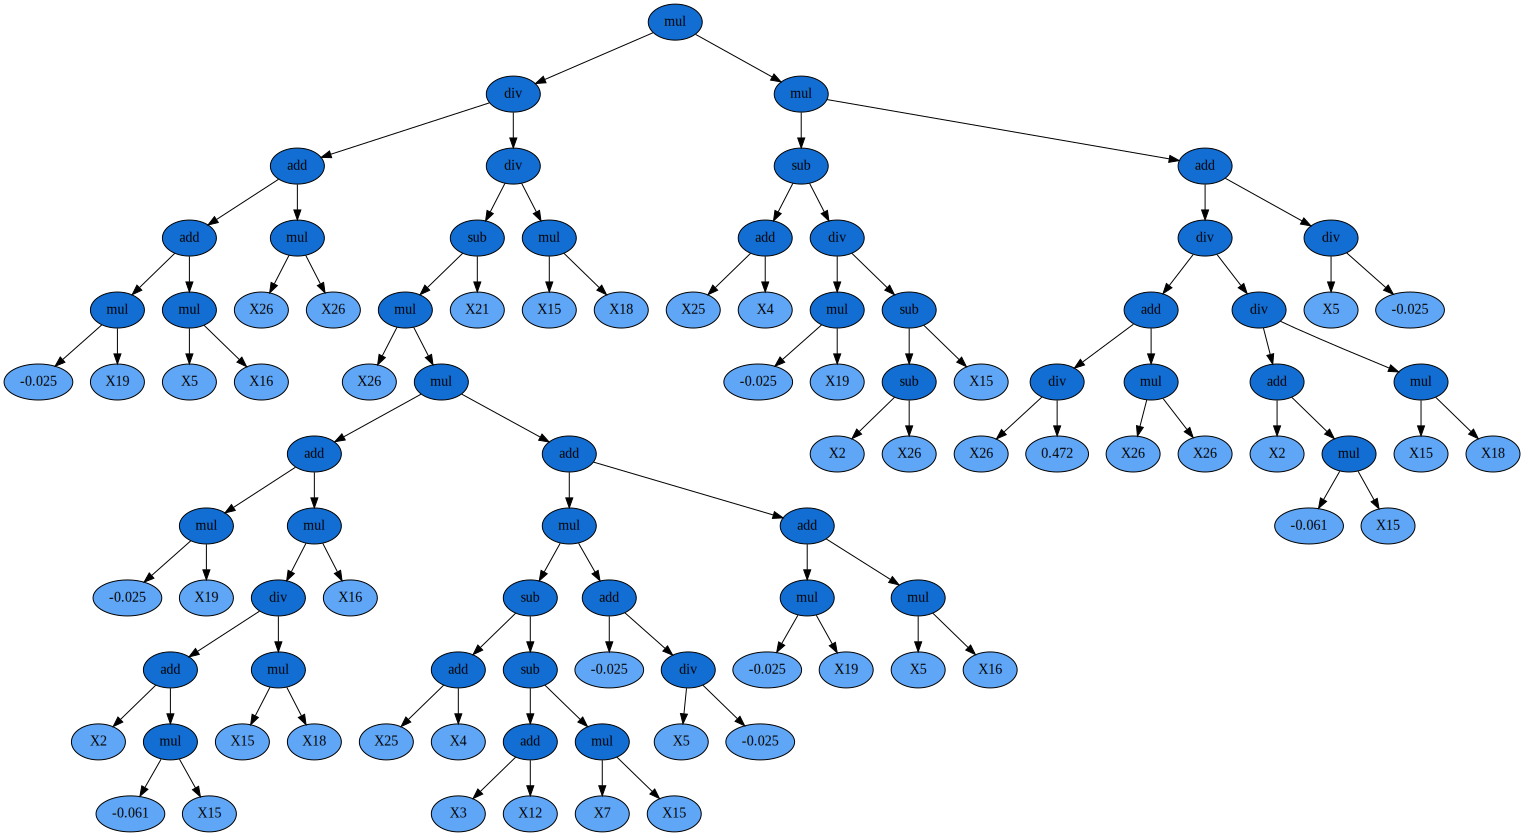

In [17]:
import graphviz
dot_data = est_gp._program.export_graphviz()
for k, v in d.items():
    dot_data.replace(v, k)
graph = graphviz.Source(dot_data)
graph


In [35]:
score_gp = est_gp.score(X_test, y_test)
score_gp

0.7736608964675251

In [36]:
y_pred = est_gp.predict(X_test)

/Users/mamu867/.virtualenvs/UQ_AL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


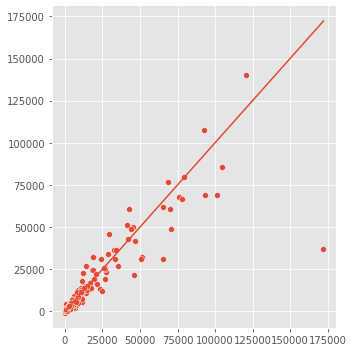

In [37]:
import seaborn as sns

sns.relplot(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

In [38]:
from scipy.stats import pearsonr 

pearsonr(y_test, y_pred)

(0.8830149970500963, 2.0521353403817473e-56)

In [39]:
max(y_train)

297588.7